In [1]:
import pandas as pd
import datasets

import torch

In [2]:
data = pd.read_csv('./toy_dataset_label.csv',sep='\t',encoding='latin-1')
print(f'Columns: {[x for x in data.columns]}')

Columns: ['ID', 'FILE', 'AUTHOR', 'BORN-DIED', 'TITLE', 'DATE', 'TECHNIQUE', 'LOCATION', 'FORM', 'TYPE', 'SCHOOL', 'TIMELINE', 'URL']


In [3]:
data.describe()

,ID
count,43455.000000
mean,21728.000000
std,12544.522311
min,1.000000
25%,10864.500000
50%,21728.000000
75%,32591.500000
max,43455.000000


In [4]:
data.head()

,ID,FILE,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,FORM,TYPE,SCHOOL,TIMELINE,URL
0,1,1.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Allegory,1598,"Oil on copper, 56 x 47 cm","Alte Pinakothek, Munich",painting,mythological,German,1601-1650,http://www.wga.hu/html/a/aachen/allegory.html
1,2,2.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)","Bacchus, Ceres and Cupid",-,"Oil on canvas, 163 x 113 cm","Kunsthistorisches Museum, Vienna",painting,mythological,German,1601-1650,http://www.wga.hu/html/a/aachen/bacchus.html
2,3,3.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Joking Couple,-,"Copperplate, 25 x 20 cm","Kunsthistorisches Museum, Vienna",painting,genre,German,1601-1650,http://www.wga.hu/html/a/aachen/j_couple.html
3,4,4.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Portrait of Emperor Rudolf II,1590s,"Oil on canvas, 60 x 48 cm","Kunsthistorisches Museum, Vienna",painting,portrait,German,1601-1650,http://www.wga.hu/html/a/aachen/rudolf2.html
4,5,5.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Self-Portrait with a Glass of Wine,c. 1596,"Oil on canvas, 53 x 44 cm",Private collection,painting,portrait,German,1601-1650,http://www.wga.hu/html/a/aachen/selfport.html


In [5]:
data['SCHOOL'].value_counts()

Italian          18150
French            6804
Dutch             5060
Flemish           3879
German            3553
Spanish           1699
English           1179
Netherlandish      765
Austrian           447
Hungarian          427
Swiss              220
American           200
Russian            180
Danish             114
Scottish           100
Catalan             96
Bohemian            89
Portuguese          87
Belgian             86
Irish               72
Greek               71
Other               57
Swedish             55
Polish              35
Norwegian           25
Finnish              5
Name: SCHOOL, dtype: int64

In [6]:
data['TECHNIQUE'] = data['TECHNIQUE'].str.split(',').str[0]
data['TECHNIQUE'] = data['TECHNIQUE'].str.split(':').str[0]

In [7]:
data['TECHNIQUE'].value_counts()

Oil on canvas                                  13649
Fresco                                          4316
Oil on panel                                    3041
Photo                                           2060
Oil on wood                                     1848
                                               ...  
Pen and black ink with gray wash on paper          1
Red chalk and pencil on paper laid on board        1
Coloured marble relief with bronze                 1
Hand coloured engraving and etching                1
Oil on canvas 250 x 225 cm                         1
Name: TECHNIQUE, Length: 2611, dtype: int64

In [8]:
data['FORM'].value_counts()

painting         30005
sculpture         4767
graphics          3813
architecture      2202
illumination      1557
metalwork          357
mosaic             253
stained-glass      124
furniture          115
tapestry           111
ceramics           105
glassware           37
others               9
Name: FORM, dtype: int64

In [9]:
data = data[:700]
eval = data[700:850]

In [10]:
from tqdm import tqdm

with tqdm(total=len(data)) as pbar:
    for idx in range(data.shape[0]):
        pbar.set_description(f'Art Piece N°: {idx}')
        data['FILE'][idx] = './images/'+str(idx+1)+'.jpg'
        eval['FILE'][idx] = './images/'+str(idx+1)+'.jpg'
        #data['URL'][idx] = get_description(data['URL'][idx])
        pbar.update()


Art Piece N°: 0:   0%|          | 0/700 [00:00<?, ?it/s]C:\Users\rullo\AppData\Local\Temp\ipykernel_16348\96189374.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval['FILE'][idx] = './images/'+str(idx+1)+'.jpg'
C:\Users\rullo\AppData\Local\Temp\ipykernel_16348\96189374.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval['FILE'][idx] = './images/'+str(idx+1)+'.jpg'
Art Piece N°: 1:   0%|          | 1/700 [00:00<00:02, 333.44it/s]C:\Users\rullo\AppData\Local\Temp\ipykernel_16348\96189374.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

In [11]:
data.head()

,ID,FILE,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,FORM,TYPE,SCHOOL,TIMELINE,URL
0,1,./images/1.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Allegory,1598,Oil on copper,"Alte Pinakothek, Munich",painting,mythological,German,1601-1650,http://www.wga.hu/html/a/aachen/allegory.html
1,2,./images/2.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)","Bacchus, Ceres and Cupid",-,Oil on canvas,"Kunsthistorisches Museum, Vienna",painting,mythological,German,1601-1650,http://www.wga.hu/html/a/aachen/bacchus.html
2,3,./images/3.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Joking Couple,-,Copperplate,"Kunsthistorisches Museum, Vienna",painting,genre,German,1601-1650,http://www.wga.hu/html/a/aachen/j_couple.html
3,4,./images/4.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Portrait of Emperor Rudolf II,1590s,Oil on canvas,"Kunsthistorisches Museum, Vienna",painting,portrait,German,1601-1650,http://www.wga.hu/html/a/aachen/rudolf2.html
4,5,./images/5.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Self-Portrait with a Glass of Wine,c. 1596,Oil on canvas,Private collection,painting,portrait,German,1601-1650,http://www.wga.hu/html/a/aachen/selfport.html


In [12]:
features = ['FILE','AUTHOR']

train_data = data[features]
eval_data = eval[features]
train_data.dropna()
eval_data.dropna()
train_data = train_data[train_data['AUTHOR'] != 0]
eval_data = eval_data[eval_data['AUTHOR'] != 0]
train_data.head()

,FILE,AUTHOR
0,./images/1.jpg,"AACHEN, Hans von"
1,./images/2.jpg,"AACHEN, Hans von"
2,./images/3.jpg,"AACHEN, Hans von"
3,./images/4.jpg,"AACHEN, Hans von"
4,./images/5.jpg,"AACHEN, Hans von"


In [13]:
train_data['AUTHOR'].value_counts()

ANDREA DEL SARTO                62
ANDREA DEL CASTAGNO             51
ANDREA DA FIRENZE               46
ALTDORFER, Albrecht             37
AMMANATI, Bartolomeo            28
                                ..
ADOLPHI, Christoffel             1
ALTOBELLO, Francesco Antonio     1
ADLER, Salomon                   1
AMEDEI, Giuliano                 1
ANGELICO, Fra                    1
Name: AUTHOR, Length: 99, dtype: int64

In [14]:
labels = train_data['AUTHOR'].unique()

In [15]:
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label]=i
    id2label[i]=label

In [16]:
train_data = train_data.rename(columns={'FILE':'image', 'AUTHOR':'label'})
eval_data = eval_data.rename(columns={'FILE':'image', 'AUTHOR':'label'})
train_data['label'] = train_data['label'].map(label2id)
eval_data['label'] = eval_data['label'].map(label2id)
train_dataset = datasets.Dataset.from_dict(train_data).cast_column('image',datasets.Image())
eval_dataset = datasets.Dataset.from_dict(eval_data).cast_column('image',datasets.Image())
print(train_dataset)
print(train_dataset['label'])

Dataset({
    features: ['image', 'label'],
    num_rows: 700
})
[0, 0, 0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 7, 7, 7, 8, 8, 9, 10, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 31, 31, 31, 31, 32, 32, 32, 32, 33, 33, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 37, 38, 38, 38, 38, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 42, 42, 43, 44, 44, 44, 44, 44, 44, 44, 44, 45, 46, 46,

In [17]:
from torch.utils.data import Dataset

class ImageCaptioningDataset(Dataset):
    
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        encoding = self.processor(images=item["image"], text=item["label"], padding="max_length", return_tensors="pt", truncation=True)
        # remove batch dimension
        encoding = {k:v.squeeze() for k,v in encoding.items()}
        return encoding

In [18]:
from transformers import AutoProcessor

processor_capt = AutoProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

In [19]:
from torchvision.transforms import RandomResizedCrop, Compose, Normalize, ToTensor

normalize = Normalize(mean=processor_capt.image_mean, std=processor_capt.image_std)

size = (

    processor_capt.size["shortest_edge"]

    if "shortest_edge" in processor_capt.size

    else (processor_capt.size["height"], processor_capt.size["width"])

)

_transforms = Compose([RandomResizedCrop(size), ToTensor(), normalize])


In [20]:
def transforms(examples):
    examples['pixel_values'] = [_transforms(img.convert('RGB'))for img in examples['image']]
    del examples['image']
    return examples

In [26]:
train = train_dataset.with_transform(transforms)
print(train)
eval = eval_dataset.with_transform(transforms)

Dataset({
    features: ['image', 'label'],
    num_rows: 700
})


In [22]:
import numpy as np
import evaluate
accuracy = evaluate.load('accuracy')

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions,references=labels)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ d:\envs\tf\lib\site-packages\transformers\utils\import_utils.py:1157 in _get_module              │
│                                                                                                  │
│   1154 │                                                                                         │
│   1155 │   def _get_module(self, module_name: str):                                              │
│   1156 │   │   try:                                                                              │
│ ❱ 1157 │   │   │   return importlib.import_module("." + module_name, self.__name__)              │
│   1158 │   │   except Exception as e:                                                            │
│   1159 │   │   │   raise RuntimeError(                                                           │
│   1160 │   │   │   │   f"Failed to import {self.__name__}.{module_name} because of the followin  │
│                                                                                                  │
│ d:\envs\tf\lib\importlib\__init__.py:126 in import_module                                        │
│                                                                                                  │
│   123 │   │   │   if character != '.':                                                           │
│   124 │   │   │   │   break                                                                      │
│   125 │   │   │   level += 1                                                                     │
│ ❱ 126 │   return _bootstrap._gcd_import(name[level:], package, level)                            │
│   127                                                                                            │
│   128                                                                                            │
│   129 _RELOADING = {}                                                                            │
│ <frozen importlib._bootstrap>:1050 in _gcd_import                                                │
│ <frozen importlib._bootstrap>:1027 in _find_and_load                                             │
│ <frozen importlib._bootstrap>:1006 in _find_and_load_unlocked                                    │
│ <frozen importlib._bootstrap>:688 in _load_unlocked                                              │
│ <frozen importlib._bootstrap_external>:883 in exec_module                                        │
│ <frozen importlib._bootstrap>:241 in _call_with_frames_removed                                   │
│                                                                                                  │
│ d:\envs\tf\lib\site-packages\transformers\pipelines\__init__.py:69 in <module>                   │
│                                                                                                  │
│    66 from .mask_generation import MaskGenerationPipeline                                        │
│    67 from .object_detection import ObjectDetectionPipeline                                      │
│    68 from .question_answering import QuestionAnsweringArgumentHandler, QuestionAnsweringPipel   │
│ ❱  69 from .table_question_answering import TableQuestionAnsweringArgumentHandler, TableQuesti   │
│    70 from .text2text_generation import SummarizationPipeline, Text2TextGenerationPipeline, Tr   │
│    71 from .text_classification import TextClassificationPipeline                                │
│    72 from .text_generation import TextGenerationPipeline                                        │
│                                                                                                  │
│ d:\envs\tf\lib\site-packages\transformers\pipelines\table_question_answering.py:26 in <module>   │
│                                                                                                  │
│    23                                                      

In [27]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

checkpoint= 'google/vit-base-patch16-224-in21k'

model = AutoModelForImageClassification.from_pretrained(
    checkpoint,
    num_labels = len(labels),
    id2label = id2label,
    label2id = label2id
)

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
from transformers import DefaultDataCollator

data_collator=DefaultDataCollator()

In [29]:
training_args = TrainingArguments(
    output_dir='culo_model',
    remove_unused_columns=False,
    #evaluation_strategy = 'epoch',
    #save_strategy = 'epoch',
    learning_rate=5e-5,
    per_device_train_batch_size = 8,
    gradient_accumulation_steps=4,
    num_train_epochs=50,
    warmup_ratio=0.1,
    logging_steps=10,
    #load_best_model_at_end = True,
    #metric_for_best_model = 'accuracy'
)

trainer = Trainer(
    model = model,
    args = training_args,
    data_collator = data_collator,
    train_dataset=train,
    tokenizer = processor_capt,
)

trainer.train()

d:\envs\tf\lib\site-packages\transformers\optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/1100 [00:00<?, ?it/s]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ C:\Users\rullo\AppData\Local\Temp\ipykernel_16348\2029330845.py:24 in <module>                   │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ 'C:\\Users\\rullo\\AppData\\Local\\Temp\\ipykernel_16348\\2029330845.py'                         │
│                                                                                                  │
│ d:\envs\tf\lib\site-packages\transformers\trainer.py:1664 in train                               │
│                                                                                                  │
│   1661 │   │   inner_training_loop = find_executable_batch_size(                                 │
│   1662 │   │   │   self._inner_training_loop, self._train_batch_size, args.auto_find_batch_size  │
│   1663 │   │   )                                                                                 │
│ ❱ 1664 │   │   return inner_training_loop(                                                       │
│   1665 │   │   │   args=args,                                                                    │
│   1666 │   │   │   resume_from_checkpoint=resume_from_checkpoint,                                │
│   1667 │   │   │   trial=trial,                                                                  │
│                                                                                                  │
│ d:\envs\tf\lib\site-packages\transformers\trainer.py:1937 in _inner_training_loop                │
│                                                                                                  │
│   1934 │   │   │   │   if (                                                                      │
│   1935 │   │   │   │   │   args.logging_nan_inf_filter                                           │
│   1936 │   │   │   │   │   and not is_torch_tpu_available()                                      │
│ ❱ 1937 │   │   │   │   │   and (torch.isnan(tr_loss_step) or torch.isinf(tr_loss_step))          │
│   1938 │   │   │   │   ):                                                                        │
│   1939 │   │   │   │   │   # if loss is nan or inf simply add the average of previous logged lo  │
│   1940 │   │   │   │   │   tr_loss += tr_loss / (1 + self.state.global_step - self._globalstep_  │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyboardInterrupt

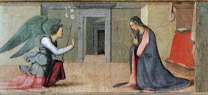

Author: ALBERTINELLI, Mariotto


In [ ]:
sample = train_dataset[223]

image = sample['image']
height,width = image.size
display(image.resize((int(0.3*height),int(0.3*width))))
caption = sample['label']
print(f'Author: {id2label[caption]}')

In [ ]:
print(train_dataset[0])

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=708x827 at 0x2E3C4D5BC70>, 'label': 0}


In [ ]:
from transformers import AutoImageProcessor

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

image_processor = AutoImageProcessor.from_pretrained(checkpoint)

inputs = image_processor(image, return_tensors="pt").to(device)

with torch.no_grad():
    logits = model(**inputs).logits

In [ ]:
predicted_label = logits.argmax(-1).item()
model.config.id2label[predicted_label]

'ALBERTINELLI, Mariotto'